# Homework -- Lecture 4: Visualization & EDA

*Given on March 8, 2022*

[Student Association for Applied Statistics (SAAS)](https://saas.berkeley.edu) <br/>
Authors: [Jonathan Pan](mailto:jonathanpan4@berkeley.edu), [Jade Pan](mailto:jpan4@berkeley.edu) <br/>

## Introduction

You have just attended the lecture on visualization and EDA. Now it is time for practice the lecture materials. The goal for this assignment is to help you get comfortable working with "messy" data. This homework should take you ~ 1 hour to complete. Please reach out to your lectures if you have any questions.

In [14]:
#notebook set up
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

## 1. Data cleaning

In [15]:
# Load income dataset
income = pd.read_csv('income/income.csv')

In [52]:
# your code here
income.columns

Index(['age', 'workclass', 'gender', 'income'], dtype='object')

**Question:** What are the columns of this dataset?

**Answer:** 'age', 'workclass', 'gender', 'income'

Plot a histogram of the age column. Does the histogram make sense? If not, can you find the bad data points?

_Hint: Does it make sense for the histogram to  extend past 100?_

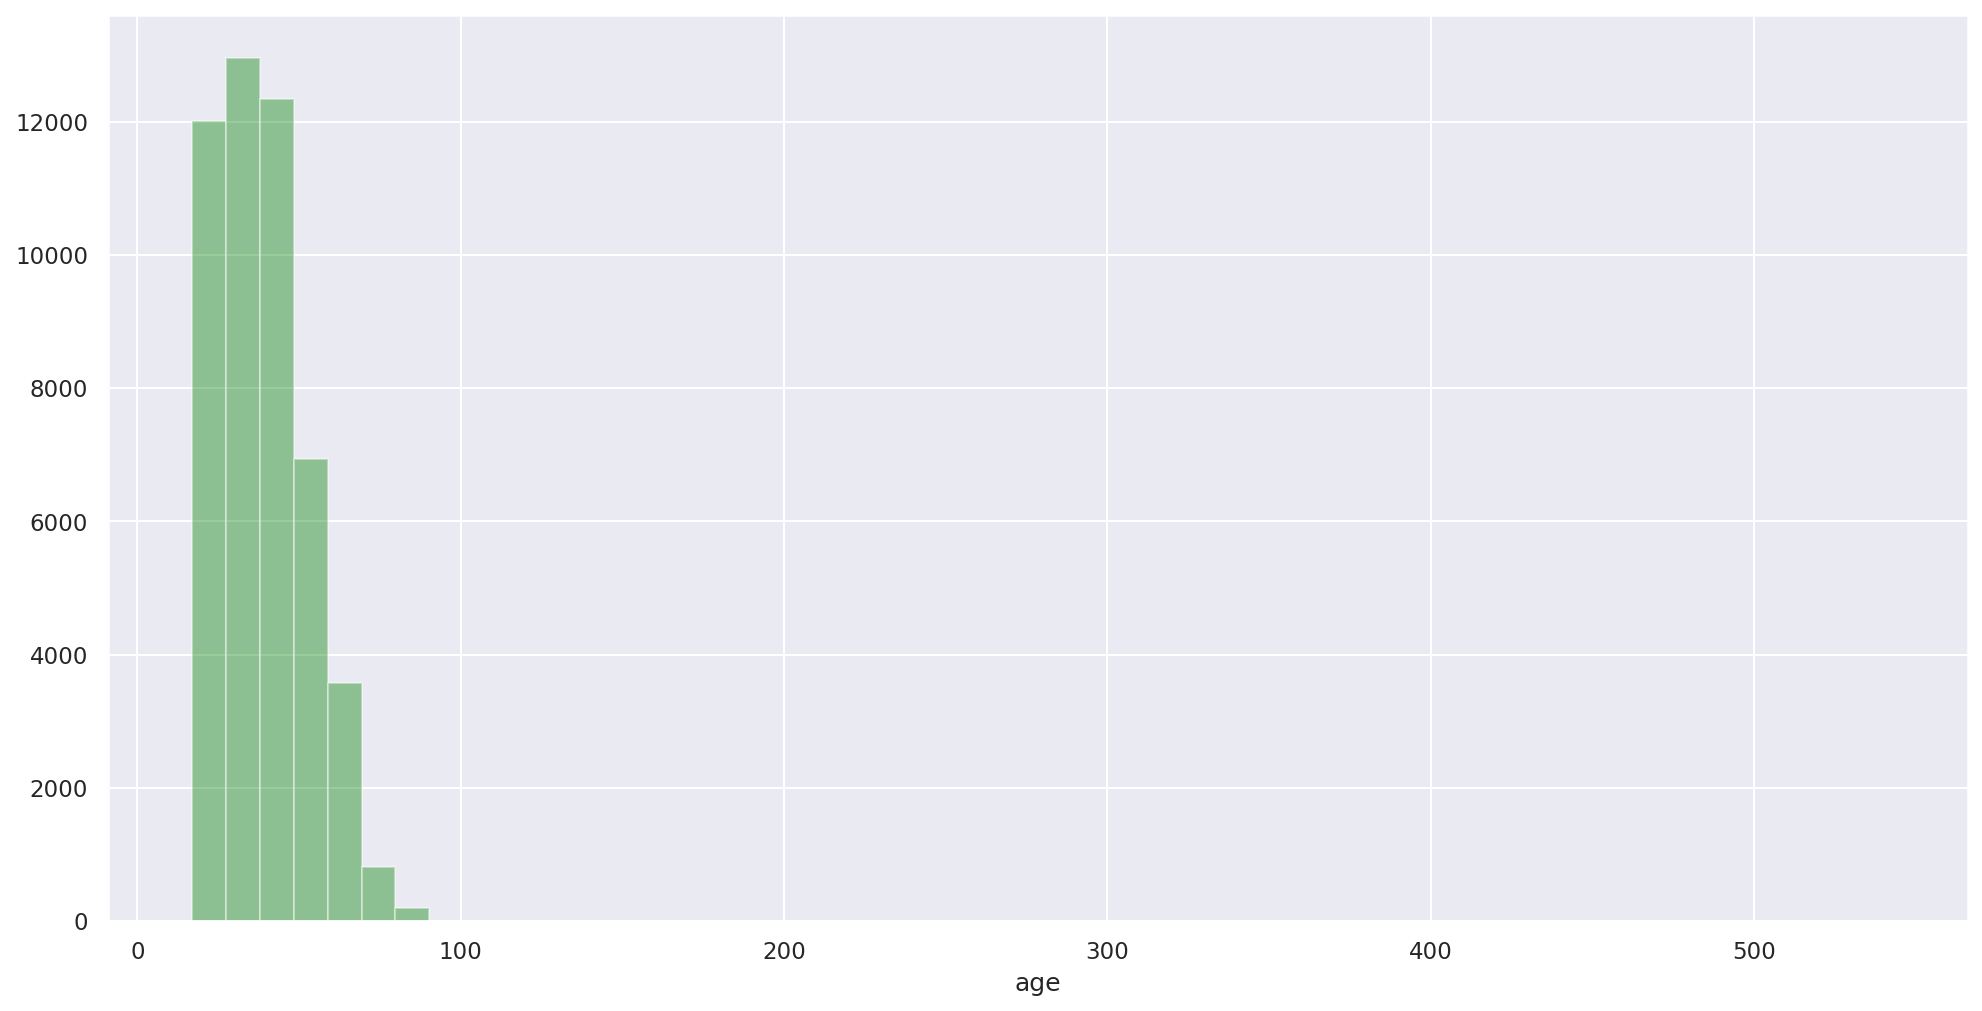

In [54]:
# your code here
income_age = income['age']

sns.distplot(income_age, kde = False, label="Age", color="green");

In [60]:
# From the histogram above, we notice that there exists data points with age 100+ which don't make sense.
# You can't exactly see where the point is but since the histogram extends to 500+, you know it is around there.
income_age_bad = income[income['age'] > 100]['age']
income_age_bad

28    540
Name: age, dtype: int64

Remove any of the bad data points you found above.

In [61]:
income.drop(28,axis=0,inplace=True)
income_age_bad = income[income['age'] > 100]['age']
income_age_bad

Series([], Name: age, dtype: int64)

#### Removing Nulls

In [7]:
# Print the table
income

,age,workclass,gender,income
0,25,Private,Male,<=50K
1,38,Private,Male,<=50K
2,28,Local-gov,Male,>50K
3,44,Private,Male,>50K
4,18,?,Female,<=50K
...,...,...,...,...
48837,27,Private,Female,<=50K
48838,40,Private,Male,>50K
48839,58,Private,Female,<=50K
48840,22,Private,Male,<=50K


How are null values represented in this dataset?

Null values are represented with '?'.

Filter out all the rows that contain null values.

In [64]:
income.replace('?', np.nan, inplace=True) # Replace '?' with nan
income_dropped = income.dropna(axis=0, subset=['workclass']) # Drop all rows with nan in the workclass column
income_dropped

,age,workclass,gender,income
0,25,Private,Male,<=50K
1,38,Private,Male,<=50K
2,28,Local-gov,Male,>50K
3,44,Private,Male,>50K
5,34,Private,Male,<=50K
...,...,...,...,...
48837,27,Private,Female,<=50K
48838,40,Private,Male,>50K
48839,58,Private,Female,<=50K
48840,22,Private,Male,<=50K


## 2. Plotting & EDA

**Question:** What is the age distribution like for this data set? What are the minimum, maximum, median age for this data set? Use income_dropped in your analysis

In [69]:
# your code here
# min
min(income_dropped['age'])

17

In [66]:
# max
max(income_dropped['age'])

90

In [68]:
#median
np.median(income_dropped['age'])

37.0

Plot the age distribution with a histogram. Make sure to exclude any outliers you found in the previous part. 

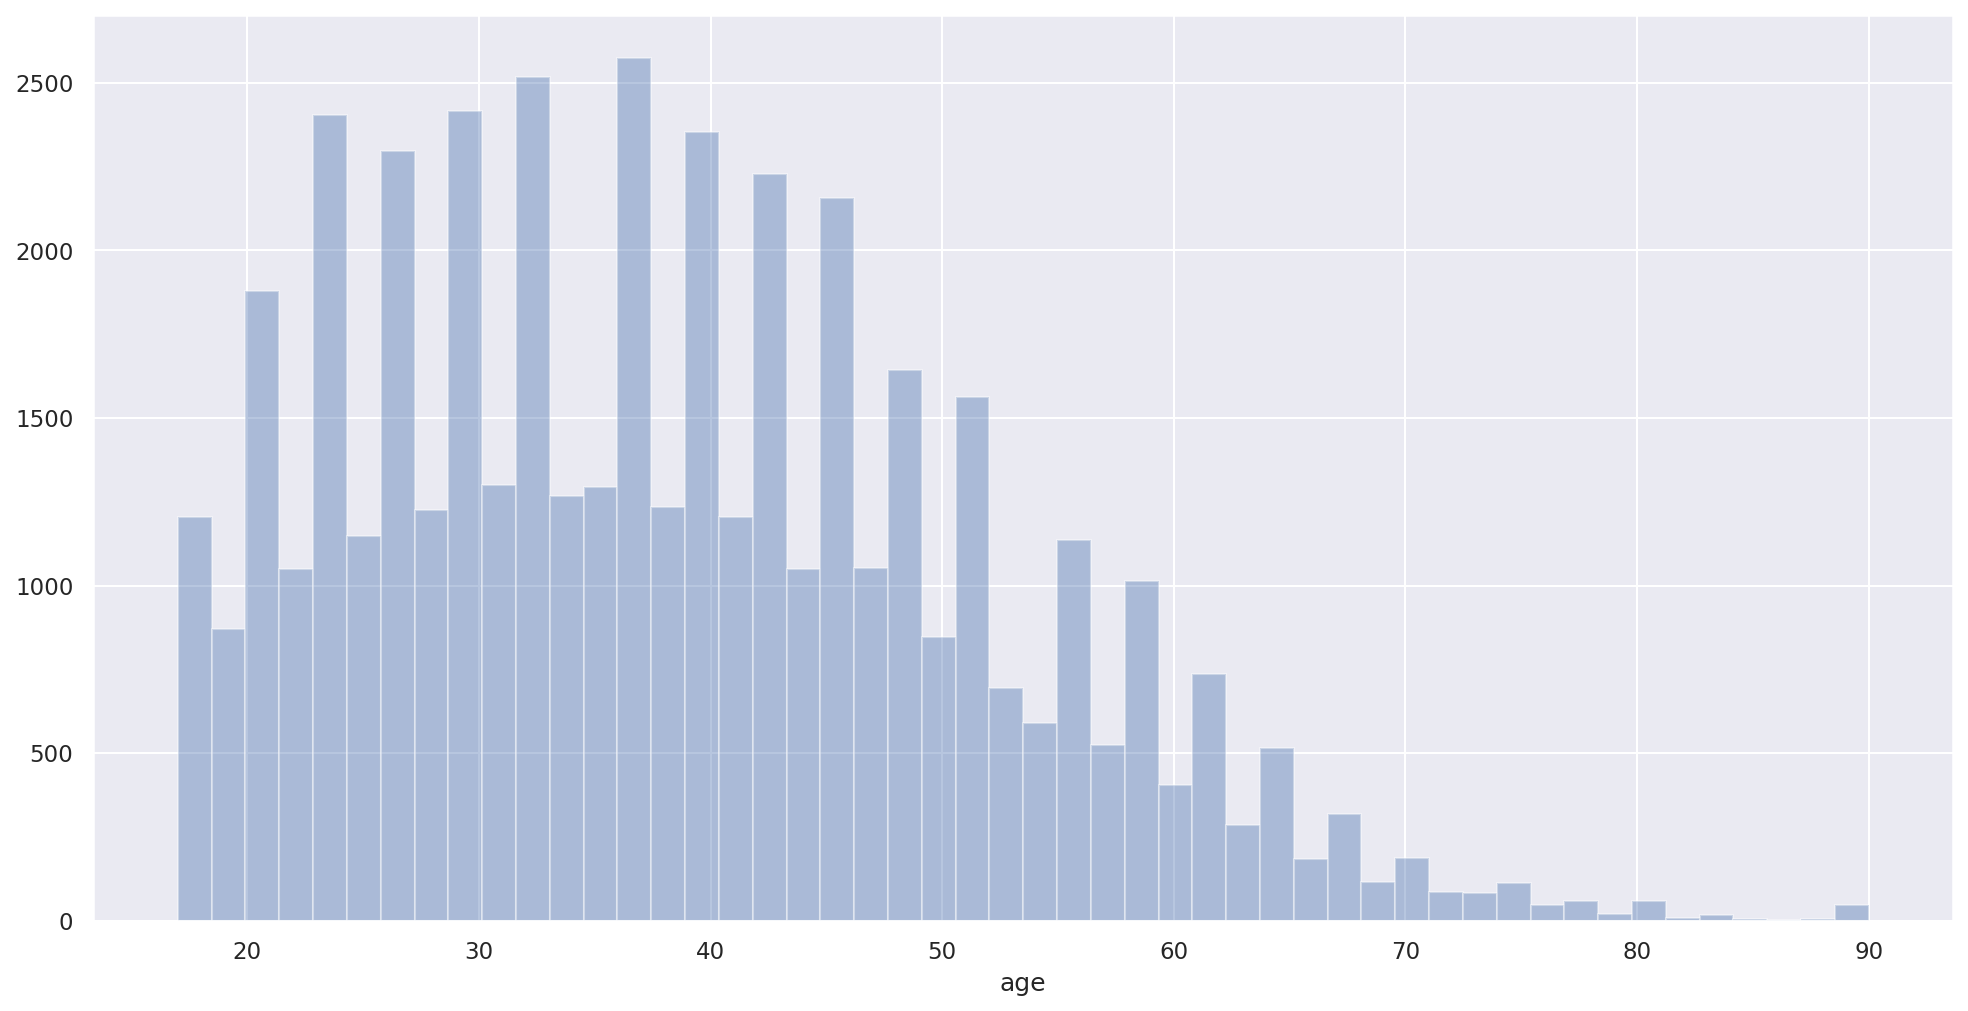

In [72]:
# your code here
sns.distplot(income_dropped['age'], kde = False);

**Question:** Is there something odd about this plot? Why do you think that is? How can you create a more smooth histogram?

**Answer:**: If you used the default bins, there seems to be peaks at certain ages such as 30, 40, 45 etc. It seems unlikely that those peaks would occur in the real world. One possible reason for this could be "error" in data collection where people rounded up or down when the age data is uncertain (if not self reported).

**Question:** Do you think this data set has a representative age distribution? Why or why not?

**Answer:** I thought it is a pretty good representation of the general uni-modal age distribution. Especially the median for this distribution is at 37, which is very similar to the median for US population age of 38. Either answer is okay as long as you can justify it.

**Open ended question:** choose one other independent variable (either workclass or gender) to complete an initial analysis. Some questions to ask yourself: are there outliers? Is the distribution representative of the population? <br>
**Questions to answer for gender:** what is the percent gender breakdown? Do you think this will cause a bias? <br>
**Questions to answer for workclass:** what is the percentage breakdown? Is the percent of private workers representative of the US population?

**Example answer:**

In [73]:
income.groupby('gender').count()

,age,workclass,income
gender,,,
Female,16192,14922,16192
Male,32649,31120,32649


Looking at the gender breakdown, we can see that there are significantly more male than female in the dataset (two times more). This could cause some bias in our analysis since male tends to make more than female even if they hold the same position.

If you chose workclass

In [74]:
income.groupby('workclass').count()

,age,gender,income
workclass,,,
Federal-gov,1432,1432,1432
Local-gov,3136,3136,3136
Never-worked,10,10,10
Private,33905,33905,33905
Self-emp-inc,1695,1695,1695
Self-emp-not-inc,3862,3862,3862
State-gov,1981,1981,1981
Without-pay,21,21,21


In [75]:
sum(income['workclass']=='Private')/len(income['workclass'])

0.6941913556233492

About 71% of the US work for private company according to payroll data, so this is pretty close.

**Question:** what type of variable is the income column? Does this data type bring limitations to your analysis? 

**Example answer:** The income column is categorical data using 50k as a cut off. This limits the type of analysis we can conduct. For example we cannot run a linear regression model on categorical income data. 

## 3. Feature engineering

Which columns need one-hot encoding?

'workclass', 'gender', 'income'

Apply one-hot encoding to those columns. Hint: use `get_dummies()`

In [9]:
income = pd.get_dummies(income_dropped, columns=['workclass', 'gender', 'income'])
income

,age,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,gender_Female,gender_Male,income_<=50K,income_>50K
0,25,0,0,0,1,0,0,0,0,0,1,1,0
1,38,0,0,0,1,0,0,0,0,0,1,1,0
2,28,0,1,0,0,0,0,0,0,0,1,0,1
3,44,0,0,0,1,0,0,0,0,0,1,0,1
5,34,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,0,0,1,0,0,0,0,1,0,1,0
48838,40,0,0,0,1,0,0,0,0,0,1,0,1
48839,58,0,0,0,1,0,0,0,0,1,0,1,0
48840,22,0,0,0,1,0,0,0,0,0,1,1,0


To put everything together, create a histogram that displays the number of people with over and under 50k income for each gender.

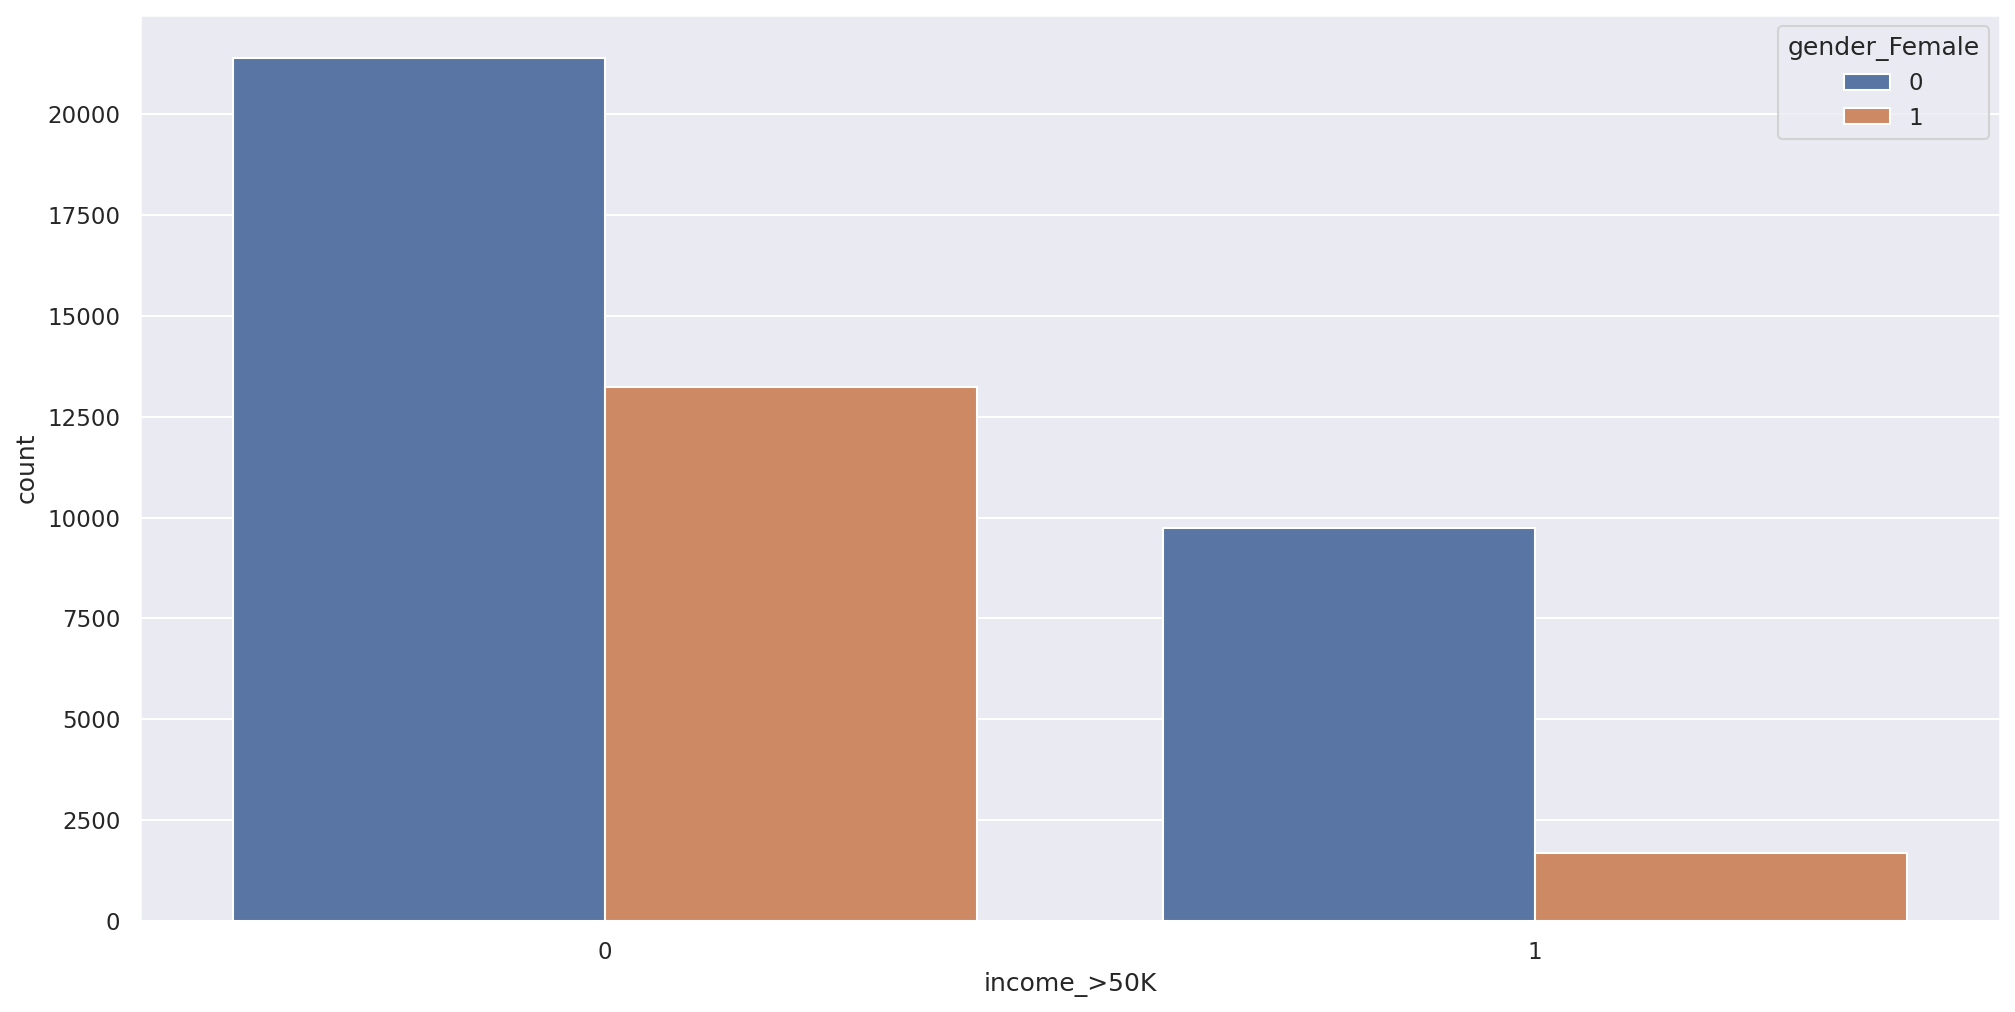

In [10]:
sns.countplot(x=income['income_>50K'], hue=income["gender_Female"]);